<a href="https://colab.research.google.com/github/ravindrakush11/Covid19-Classification-using-CNN/blob/main/To_Predict_Covid19__Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/CovidDataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

Completed


In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
import tensorflow.keras as tf

In [ ]:
#Training model(CNN)
model = Sequential()   ## creating a blank model
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))    ### reduce the overfitting
 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())    ### input layer
model.add(Dense(64,activation='relu'))    ## hidden layer of ann
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))   ## output layer
 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Modlding train images
from tensorflow.keras.preprocessing import image
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
 
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
#### Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 0.7016 - accuracy: 0.5134 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6553 - accuracy: 0.6562 - val_loss: 0.6206 - val_accuracy: 0.8750
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.5045 - accuracy: 0.7902 - val_loss: 0.3956 - val_accuracy: 0.9375
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.3249 - accuracy: 0.8616 - val_loss: 0.1673 - val_accuracy: 0.9688
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.1953 - accuracy: 0.9286 - val_loss: 0.2135 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.1940 - accuracy: 0.9241 - val_loss: 0.0987 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.1720 - accuracy: 0.9554 - val_loss: 0.0874 - val_accuracy: 0.9688
Epoch 8/20
7/7 [========================

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/CovidDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg',target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)   ### flattening
ypred = model.predict(img)
if ypred[0][0] == 1:
  print("Covid Negative")
else:
  print("Covid Positive")

1/1 [==============================] - 0s 15ms/step
Covid Positive


In [ ]:
ypred[0][0]

0.0

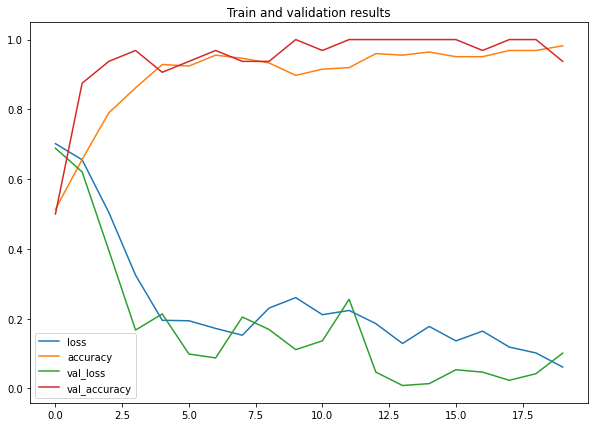

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

In [ ]:
loss, accuracy = model.evaluate(img, ypred)
print('Test accuracy:' , accuracy * 100,'%')

1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 100.0 %


In [ ]:
#Convert prediction probabilities into integers
y_preds = ypred.argmax(axis=1)

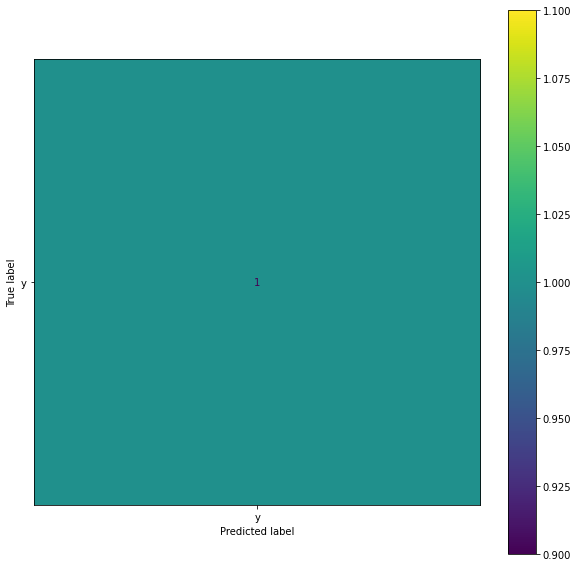

In [ ]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
#Confusion matrix

cm=confusion_matrix(ypred, ypred)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels='ypred')
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [ ]:
#### save the model
model.save("covid_model.h5")

In [ ]:
import tensorflow.keras as tf
mymodel = tf.models.load_model("/content/covid_model.h5")

1/1 [==============================] - 0s 18ms/step
Covid Negative


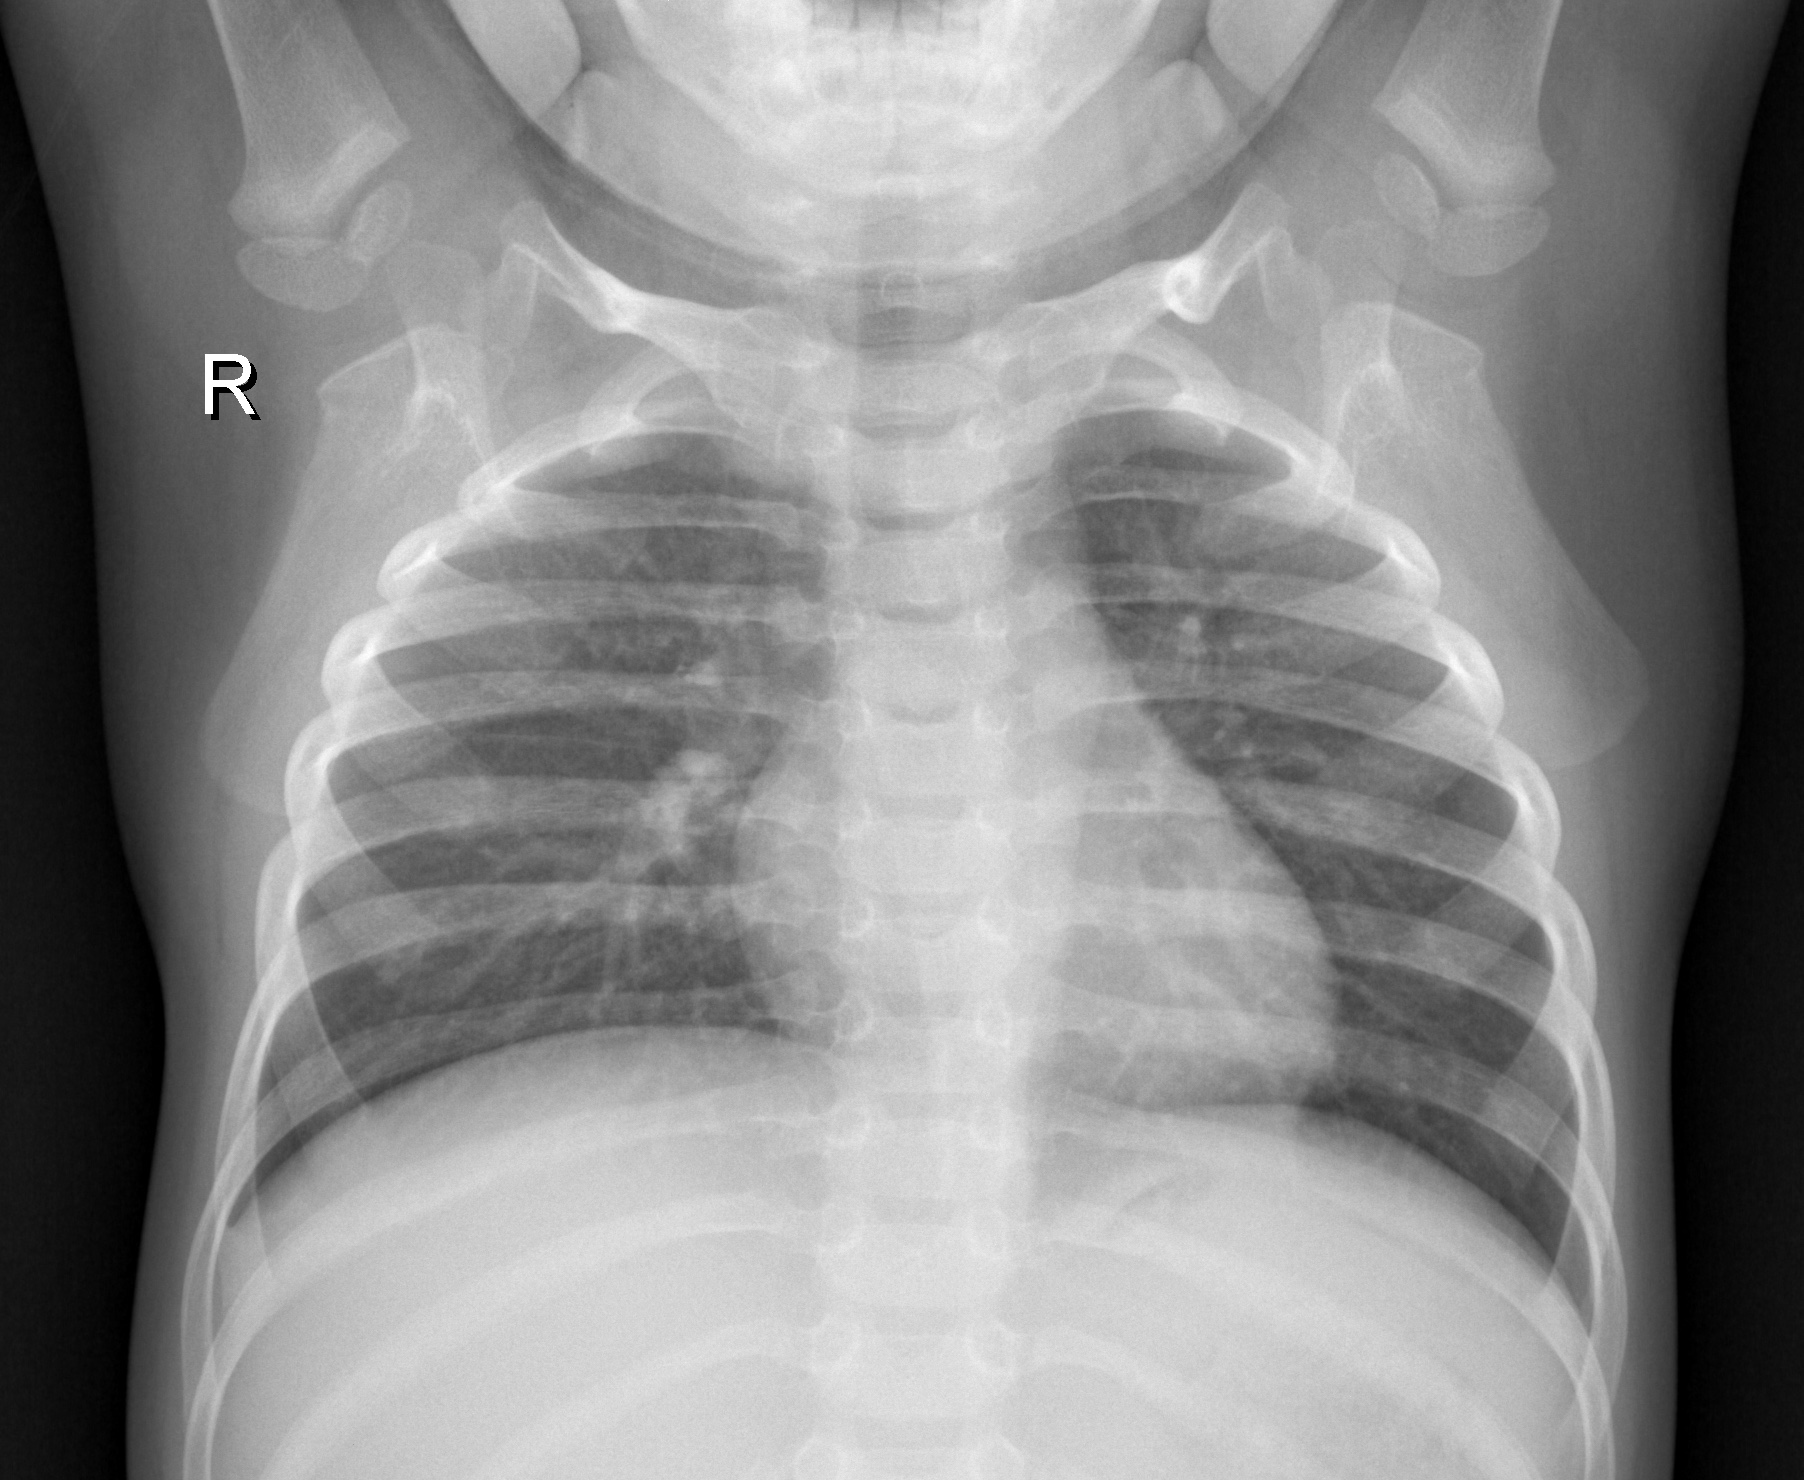

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = image.load_img('/content/CovidDataset/Train/Normal/IM-0221-0001.jpeg',target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)   ### flattening
ypred = mymodel.predict(img)
if ypred[0][0] == 1:
  print("Covid Negative")
else:
  print("Covid Positive")


image = cv2.imread('/content/CovidDataset/Train/Normal/IM-0221-0001.jpeg')
cv2_imshow(image)